In [86]:
#The Code of Titanic Sinking Disaster Assignment
#Importing the Python libraries  
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
#Step 1: Load the Train DataSet 
df=pd.read_csv("E:/Python/Data/titanic/train.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [88]:
# Removing the columns which are not necessary
df=df.drop(['Name','PassengerId', 'Parch','SibSp','Ticket','Cabin','Embarked','Fare'], axis = 1) 
df.head(7)


,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
5,0,3,male,NaN
6,0,1,male,54.0


In [89]:
#Step 2: Data Visualization
#Checking if there any null values exist
df.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [90]:
# Step 3: Data Cleaning process
#Fillup the NULL values With MEDIAN Method 
df = df.fillna(df.median().round(2))
df


,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
5,0,3,male,28.0
6,0,1,male,54.0
7,0,3,male,2.0
8,1,3,female,27.0
9,1,2,female,14.0


In [91]:
#Rechecking  all the columns
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [92]:
#Load and clean the Test DataSet
df2=pd.read_csv("E:/Python/Data/titanic/test.csv")
df2


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [93]:
## Removing the columns which are not necessary
test_data=df2.drop(['Name','PassengerId', 'Parch','SibSp','Ticket','Cabin','Embarked','Fare'], axis = 1) 
test_data.head()


,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0


In [94]:
#Checking the null values
test_data.isnull().sum()

Pclass     0
Sex        0
Age       86
dtype: int64

In [95]:
#Fillup the NULL values With MEDIAN Method
test_data = test_data.fillna(df.median().round(2))
test_data.isnull().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

In [96]:
#We will use Dummy variables to segregate subgroups for "Sex" column 
#and convert categorical values to numerical values 
df = pd.get_dummies(df,columns=['Sex'])
df.head(10)

,Survived,Pclass,Age,Sex_female,Sex_male
0,0,3,22.0,0,1
1,1,1,38.0,1,0
2,1,3,26.0,1,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1
5,0,3,28.0,0,1
6,0,1,54.0,0,1
7,0,3,2.0,0,1
8,1,3,27.0,1,0
9,1,2,14.0,1,0


In [97]:
#The same method is applying for the TEST Dataset also
test_data = pd.get_dummies(test_data,columns=['Sex'])
test_data.head(10)


,Pclass,Age,Sex_female,Sex_male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,1,0
5,3,14.0,0,1
6,3,30.0,1,0
7,2,26.0,0,1
8,3,18.0,1,0
9,3,21.0,0,1


In [98]:
#select the input dataset and output dataset
X = df.drop('Survived', axis=1)
y = df['Survived']

In [56]:
#Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)


(623, 4) (268, 4)
(623,) (268,)


In [99]:
#Import logistic Regression Model
model = LogisticRegression()

#fit the model on train data set
model.fit(X_train, y_train)

#Mean overall accuracy on test set 
model.score(X_test,y_test)


0.8022388059701493

In [58]:
#intercept and coefficient
model.coef_
model.intercept_


array([2.1072998])

In [59]:
#Odds Ratio
OR = np.exp(model.coef_)
pd.Series(OR[0],index=X_train.columns)


Pclass         0.336732
Age            0.971149
Sex_female    10.330807
Sex_male       0.796259
dtype: float64

In [18]:
#Predicted probablity for test set
probs = model.predict_proba(X_test)
np.round(probs,decimals=2)


array([[0.21, 0.79],
       [0.91, 0.09],
       [0.2 , 0.8 ],
       [0.9 , 0.1 ],
       [0.5 , 0.5 ],
       [0.86, 0.14],
       [0.5 , 0.5 ],
       [0.79, 0.21],
       [0.91, 0.09],
       [0.1 , 0.9 ],
       [0.91, 0.09],
       [0.88, 0.12],
       [0.89, 0.11],
       [0.92, 0.08],
       [0.89, 0.11],
       [0.5 , 0.5 ],
       [0.18, 0.82],
       [0.94, 0.06],
       [0.86, 0.14],
       [0.89, 0.11],
       [0.47, 0.53],
       [0.93, 0.07],
       [0.84, 0.16],
       [0.46, 0.54],
       [0.21, 0.79],
       [0.54, 0.46],
       [0.89, 0.11],
       [0.24, 0.76],
       [0.59, 0.41],
       [0.46, 0.54],
       [0.91, 0.09],
       [0.2 , 0.8 ],
       [0.2 , 0.8 ],
       [0.46, 0.54],
       [0.46, 0.54],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.92, 0.08],
       [0.76, 0.24],
       [0.57, 0.43],
       [0.58, 0.42],
       [0.11, 0.89],
       [0.09, 0.91],
       [0.91, 0.09],
       [0.91, 0.09],
       [0.61, 0.39],
       [0.94, 0.06],
       [0.64,

In [60]:
#Predicted class lebel for test set
y_pred = model.predict(X_test)
y_pred


array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

Text(0.5,15,'Predicted Class')

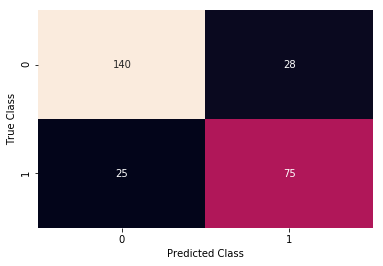

In [61]:
#Interpret the Model prediction using Confution matrix
mat1 = confusion_matrix(y_test,y_pred)
sns.heatmap(mat1,annot=True,cbar=False,fmt='d')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')


In [62]:
# Now Final Prediction of Given Test Dataset using logistic Regression model
y_pred = model.predict(test_data)
y_pred


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [63]:
# We use Decision Tree Algorithm to compare best results
DT= DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT.score(X_test,y_test)


0.7873134328358209

In [65]:
#We use Random Forest Algorithm also  
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.score(X_test,y_test)


0.7910447761194029

In [67]:
#Here we can see that Logistic Regression Model Gives the Best Prediction Score
#So, we'll choose Logistic Reg. for our assignment
#Now We create a DataFrame where we store the result as output
df3 = pd.DataFrame(y_pred,columns=['Survived'])
df3.head()


,Survived
0,0
1,0
2,0
3,0
4,1


In [68]:
#Take the "PassengerId" column from test dataset and put our prediction result according to it. 
final_result = df3.join(df2['PassengerId']).iloc[:,::-1]


In [69]:
final_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [33]:
#Store the result in a Excel file
final_result.to_csv('E:/Python/Data/titanic/final_submission.csv', index=False)
